In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
# print(os.listdir("../input"))
# Any results you write to the current directory are saved as output.

In [1]:
import os
import re
import openpyxl
import pkg_resources, imp
imp.reload(pkg_resources)
import numpy as np
import pandas as pd
import spacy
from matplotlib import pyplot as plt
import regex
from wordcloud import WordCloud
import collections
# use janome tokenizer
import itertools
import unicodedata
from janome.tokenizer import Tokenizer
import networkx as nx
from scipy.spatial import distance
%matplotlib inline
import matplotlib.pyplot as plt
# plt.rcParams['font.family'] = 'Droid Sans Japanese'

plt.rcParams['font.family'] = './fonts/simhei.ttf'

In [2]:
plt.rcParams['font.family']

['./fonts/simhei.ttf']

In [8]:
help(plt.rcParams)

Help on RcParams in module matplotlib object:

class RcParams(collections.abc.MutableMapping, builtins.dict)
 |  RcParams(*args, **kwargs)
 |  
 |  A dictionary object including validation.
 |  
 |  Validating functions are defined and associated with rc parameters in
 |  :mod:`matplotlib.rcsetup`.
 |  
 |  The list of rcParams is:
 |  
 |  - _internal.classic_mode
 |  - agg.path.chunksize
 |  - animation.bitrate
 |  - animation.codec
 |  - animation.convert_args
 |  - animation.convert_path
 |  - animation.embed_limit
 |  - animation.ffmpeg_args
 |  - animation.ffmpeg_path
 |  - animation.frame_format
 |  - animation.html
 |  - animation.writer
 |  - axes.autolimit_mode
 |  - axes.axisbelow
 |  - axes.edgecolor
 |  - axes.facecolor
 |  - axes.formatter.limits
 |  - axes.formatter.min_exponent
 |  - axes.formatter.offset_threshold
 |  - axes.formatter.use_locale
 |  - axes.formatter.use_mathtext
 |  - axes.formatter.useoffset
 |  - axes.grid
 |  - axes.grid.axis
 |  - axes.grid.which
 

In [9]:
import os
os.getcwd()
print(os.getcwd())

c:\Users\zhouy217\OneDrive - Pfizer\Documents\easynlp


In [3]:
def ReadFile(filename,col_list,name_list,file_sep=",",file_header='infer'):
    import pandas as pd 
    import os
    if not os.path.exists(filename):
        print('File [{}] not exist, please double check!'.format(filename))
    else:
        if os.path.splitext(filename)[1]=='.csv':
            df=pd.read_csv(filename)
        elif os.path.splitext(filename)[1]=='.xlsx':
            df=pd.read_excel(filename,usecols=col_list,names=name_list)
        elif os.path.splitext(filename)[1]=='.txt':
            df=pd.read_csv(filename,sep=file_sep,header=file_header)
        elif os.path.splitext(filename)[1]=='.json':
            df=pd.read_json(filename)
        return df
df=ReadFile("c:\\Users\\zhouy217\\OneDrive - Pfizer\\Documents\\easynlp\\ja_slide9_data.xlsx",col_list=[15],name_list=['sentence'])

In [5]:
# Load the dataset into a pandas dataframe.
import pandas as pd
# col_list=[10,11,15,16]
# df = pd.read_excel("/kaggle/input/ja-nlp/ja_slide9_data.xlsx", usecols=col_list,names=['sentence1','sentence2','sentence3','sentence4'])
col_list=[15]
# df = pd.read_excel("/kaggle/input/ja-nlp/ja_slide9_data.xlsx", usecols=col_list,names=['sentence'])
df = pd.read_excel("c:\\Users\\zhouy217\\OneDrive - Pfizer\\Documents\\easynlp\\ja_slide9_data.xlsx", usecols=col_list,names=['sentence'])
# Report the number of sentences.
print('Number of training sentences: {:,}\n'.format(df.shape[0]))

# Display 10 random rows from the data.
df.head(5)

Number of training sentences: 133



,sentence
0,もっとベタニスベオーバを学ぶ
1,特になし
2,他剤理解しTOV継続訴求
3,不安は無いです
4,インサイトの深堀が重要であることは着任時から重要と思い指導している。しかし、現場で出来ている...


In [13]:
str(df.values[0])

"['もっとベタニスベオーバを学ぶ']"

In [14]:
import spacy
nlp = spacy.load("ja_core_news_sm")
# sentence_array = df.values
doc=nlp(str(df.values[0]))
for word in doc.ents:
    print(word.text,word.label_)

ベタニスベオーバ PERSON


In [15]:
import cov_bsv

nlp = cov_bsv.load()
doc = nlp('Pt tested for COVID-19. His wife was recently diagnosed with novel coronavirus. SARS-COV-2: Detected')

print(doc.ents)
print(doc._.cov_classification)
cov_bsv.visualize_doc(doc)

ModuleNotFoundError: No module named 'cov_bsv'

In [16]:
import medspacy
from medspacy.ner import TargetRule

nlp = medspacy.load()
print(nlp.pipe_names)

nlp.get_pipe('target_matcher').add([TargetRule('stroke', 'CONDITION'), TargetRule('diabetes', 'CONDITION'), TargetRule('pna', 'CONDITION')])
doc = nlp('Patient has hx of stroke. Mother diagnosed with diabetes. No evidence of pna.')

for ent in doc.ents:
    print(ent, ent._.is_negated, ent._.is_family, ent._.is_historical)
medspacy.visualization.visualize_ent(doc)

UnicodeDecodeError: 'gbk' codec can't decode byte 0xa2 in position 4099: illegal multibyte sequence

In [12]:
def token_japanese_sentence(df):
    #tokenize sentences by element,返回二维列表，二维列表的每个元素是逐个单元格的句子分词后的token集合
    sentence_array = df.values
    # sentence_array = df.as_matrix()
    # tweets=df['sentence1'].as_matrix()+df['sentence2'].as_matrix()+df['sentence3'].as_matrix()+df['sentence4'].as_matrix()
    regex = u'[^\u3041-\u3093\u30A1-\u30F4\u4E00-\u9FCB]'
    '''
    [\u3040-_309F-] 所有平假名
    [\u30A0-\u30FF] 所有片假名
    [\u4E00-\u9FFF] 所有的汉字
    使用正则表达式，用汉字、片假名、平假名作为边界，辅助将日文句子划分为单词
    '''
    t = Tokenizer()
    WordList_in_SentenceList = []
    for tweet in sentence_array:
        tweet = re.sub(regex, ' ', tweet)
        #The re.sub() replace the substrings that match with the search pattern with a string of user’s choice.
        words = []
        for token in t.tokenize(tweet):
            speechs = token.part_of_speech.split(',')
            if ('名詞' in speechs) or ('形容詞' in speechs) or ('動詞' in speechs):
                if len(token.surface) > 1:
                    words.append(token.surface)
        WordList_in_SentenceList.append(words)
    return WordList_in_SentenceList

tweet_words=token_japanese_sentence(df['sentence'])
# tweet_words

### one-unit word frequency

In [13]:
def word_freq(word_list):
    #count word frequency
    
    word_cnt = {}
    for words in word_list:
        for word in words:
            if word not in word_cnt:
                word_cnt[word] = 1
            else:
                word_cnt[word] += 1
    word_cnt_df = pd.DataFrame({'word': [k for k in word_cnt.keys()], 'cnt': [v for v in word_cnt.values()]})
#     word_cnt_df=word_cnt_df.sort_values(by='cnt', ascending=False)
    return word_cnt,word_cnt_df

one_word_cnt,one_word_cnt_df=word_freq(tweet_words)
one_word_cnt_df.head(5)

,word,cnt
0,ベタニスベオ,1
1,学ぶ,1
2,なし,13
3,理解,5
4,継続,1


In [14]:
one_word_cnt_df[['cnt']].describe()

,cnt
count,350.000000
mean,2.008571
std,2.346108
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,18.000000


findfont: Font family ['./fonts/simhei.ttf'] not found. Falling back to DejaVu Sans.
findfont: Font family ['./fonts/simhei.ttf'] not found. Falling back to DejaVu Sans.
C:\ANACONDA3\envs\ja_nlp_python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20986 (\N{CJK UNIFIED IDEOGRAPH-51FA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ANACONDA3\envs\ja_nlp_python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26469 (\N{CJK UNIFIED IDEOGRAPH-6765}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ANACONDA3\envs\ja_nlp_python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 29702 (\N{CJK UNIFIED IDEOGRAPH-7406}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ANACONDA3\envs\ja_nlp_python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 35299 (\N{CJK UNIFIED IDEOGRAPH-89E3}) missing from current font.
  fig.canvas.print_figure(by

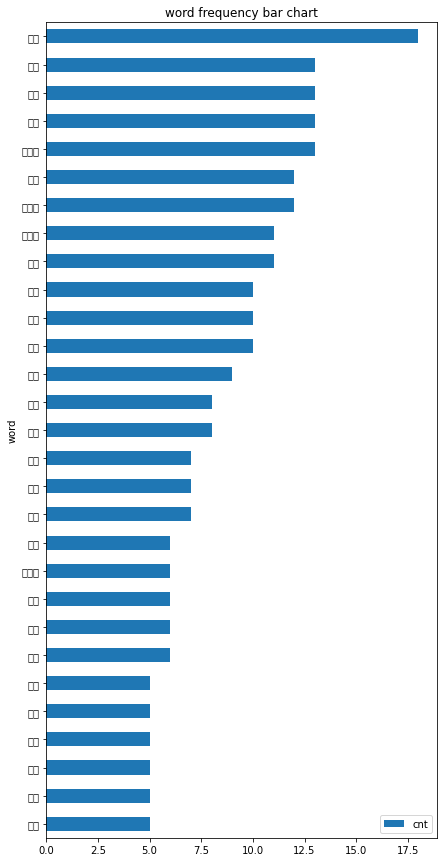

In [15]:
def barh_plot(word_cnt_df,col_name,word_cnt=3,xname='word',yname='cnt',plt_title='word frequency bar chart'):
    #plot bar graph

    tmp = word_cnt_df[word_cnt_df[col_name] > word_cnt]#wor_cnt参数用来限定:词频>word_cnt的词语入选，绘制条形图
    tmp.sort_values(by=col_name, ascending=True).plot.barh( x=xname, y=yname,figsize=(7,15))
    plt.title(plt_title)
    plt.show()
    
barh_plot(one_word_cnt_df,col_name='cnt',word_cnt=4)

In [17]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

df = one_word_cnt_df
ax = df.plot()
legend = ax.legend()
# font = font_manager.FontProperties(fname='/Users/user/Downloads/IPAfont00303/ipag.ttf')
font = font_manager.FontProperties(fname='C:\\Windows\\Fonts\\Yu Gothic')

for text in legend.texts:
    text.set_font_properties(font)

plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Windows\\Fonts\\Yu Gothic'

### two-unit word frequency

In [14]:
# tweet_words
'''
tweet_words是大列表，其中的元素以dataframe中每一格作单位，进行分词。
第一格对应的分词列表是tweet_words这个大列表的第一个元素，以此类推
'''
def flatten_list(_2d_list):
    '''converting a 2D list into a 1D list'''
    flat_list = []
    # Iterate through the outer list
    for element in _2d_list:
        if type(element) is list:
            # If the element is of type list, iterate through the sublist
            for item in element:
                flat_list.append(item)
        else:
            flat_list.append(element)
    return flat_list

one_word_list=flatten_list(tweet_words)
# print(one_word_list)

In [15]:
def unit2_permutation(word_list,n=2):
    from itertools import permutations
    word_2=permutations(word_list,2)
    unit2_permutation_list = [''.join(i) for i in word_2]
    return unit2_permutation_list

two_unit_list=unit2_permutation(one_word_list,n=2)

In [16]:
def concat_sentence(dataframe):
    '''concat sentence from dataframe'''
    sentences = df.sentence.values
    sentence=[]
    for sen in sentences:
        sentence.append(sen)
    concat_sen_text='.'.join(sentence)
    return concat_sen_text

col15_sentence_text=concat_sentence(df)

In [17]:
def unit2_dictionary(str,word_list):
    '''check and count word in word_list, whether the word(substring) is in the string and its count'''
    counts = dict()
    for word in word_list:
        dic=str.count(word)
        # counts[word] =dic
        if dic!=0:
            counts[word] =dic
    return counts

unit2_dic=unit2_dictionary(col15_sentence_text,two_unit_list)
# print(unit2_dic)

In [18]:
'''
sort dictionary by words count
'''
def sort_dict_by_value(raw_dict):
    sorted_dict = {}
    sorted_keys = sorted(raw_dict, key=raw_dict.get,reverse=True)  # [1, 3, 2]
    for w in sorted_keys:
        sorted_dict[w] = raw_dict[w]    
    return sorted_dict

unit2_dic_sorted=sort_dict_by_value(unit2_dic)
sorted_dict=unit2_dic_sorted

In [19]:
two_word_cnt_df = pd.DataFrame({'two_word': [k for k in sorted_dict.keys()], 'two_word_freq': [v for v in sorted_dict.values()]})
len(two_word_cnt_df)
two_word_cnt_df.head(8)

,two_word,two_word_freq
0,インサイト,13
1,製品知識,5
2,患者さん,3
3,いる先生,2
4,すること,2
5,臨床試験,2
6,活動膀胱,2
7,出来るよう,2


C:\ANACONDA3\envs\ja_nlp_python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12356 (\N{HIRAGANA LETTER I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ANACONDA3\envs\ja_nlp_python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12427 (\N{HIRAGANA LETTER RU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ANACONDA3\envs\ja_nlp_python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20808 (\N{CJK UNIFIED IDEOGRAPH-5148}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ANACONDA3\envs\ja_nlp_python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 29983 (\N{CJK UNIFIED IDEOGRAPH-751F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ANACONDA3\envs\ja_nlp_python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12377 (\N{HIRAGANA LETTER SU}) missing from current font.
  fig.canvas

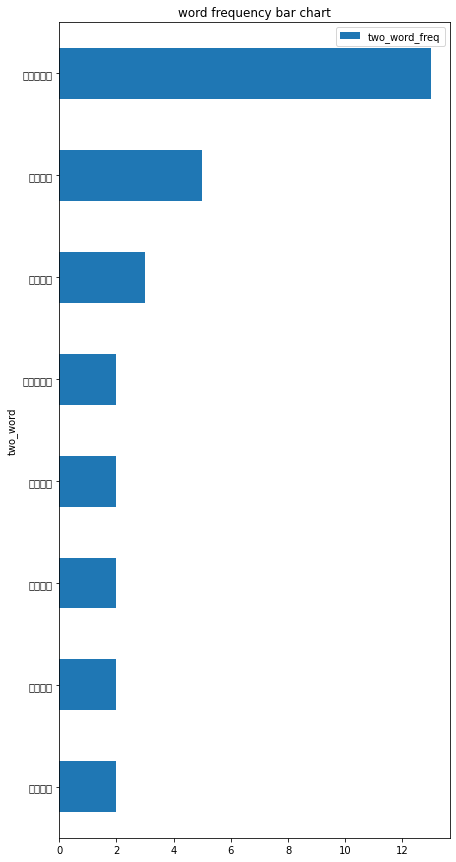

In [20]:
barh_plot(two_word_cnt_df,col_name='two_word_freq',word_cnt=1,xname='two_word',yname='two_word_freq')
##对两词组合词频大于1的词，作图

### bigram

In [27]:
def create_bigram_df(word_list):
    import nltk
    bigrams=list(nltk.bigrams(word_list))
    bigram_counts = collections.Counter(bigrams)
    bigram_counts.most_common(20)
    bigram_df = pd.DataFrame(bigram_counts.most_common(20),
                             columns=['bigram', 'count'])

    return bigram_df

bigram_df=create_bigram_df(one_word_list)
# bigram_df

In [28]:
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')

findfont: Font family ['Droid Sans Japanese'] not found. Falling back to DejaVu Sans.
C:\ANACONDA3\envs\ja_nlp_python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 31478 (\N{CJK UNIFIED IDEOGRAPH-7AF6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ANACONDA3\envs\ja_nlp_python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 21512 (\N{CJK UNIFIED IDEOGRAPH-5408}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ANACONDA3\envs\ja_nlp_python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 24773 (\N{CJK UNIFIED IDEOGRAPH-60C5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ANACONDA3\envs\ja_nlp_python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 22577 (\N{CJK UNIFIED IDEOGRAPH-5831}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ANACONDA3\envs\ja_nlp_python37\lib\site-packages\IPython\core\pylab

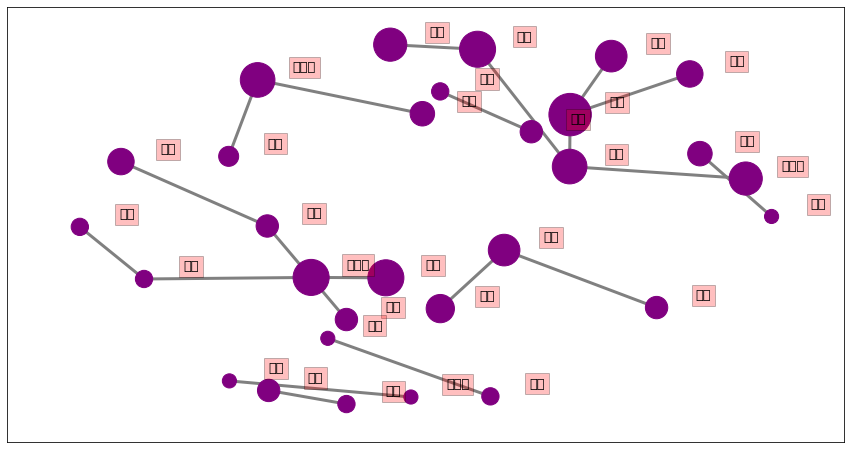

In [29]:
def cooccurrence_network(dictionary_of_bigrams):
    # Create network plot 
    G = nx.Graph()

    # Create connections between nodes
    for k, v in d[0].items():
        G.add_edge(k[0], k[1], weight=(v * 10))
    fig, ax = plt.subplots(figsize=(15, 8))

    pos = nx.spring_layout(G, k=2)

    # Plot networks
    nx.draw_networkx(G, pos,
                     font_size=16,
                     width=3,
                     edge_color='grey',
                     node_color='purple',
                     node_size=[one_word_list.count(n[0])*100 for (n) in G.nodes(data=True)],
                     with_labels = False,
                     ax=ax)

    # Create offset labels
    for key, value in pos.items():
        x, y = value[0]+.135, value[1]+.045
        ax.text(x, y,
                s=key,
                bbox=dict(facecolor='red', alpha=0.25),
                horizontalalignment='center', fontsize=13)

    plt.show()
cooccurrence_network(d)

### co-occurrence network

In [41]:
def create_word_network(word_cnt_df,cnt=3):
    vocab = {}
    # target_words = word_cnt_df[word_cnt_df['cnt'] > cnt]['word'].as_matrix()
    target_words = word_cnt_df[word_cnt_df['cnt'] > cnt]['word'].values
    for word in target_words:
        if word not in vocab:
            vocab[word] = len(vocab)

    re_vocab = {}
    for word, i in vocab.items():
        re_vocab[i] = word
        
    tweet_combinations = [list(itertools.combinations(words, 2)) for words in tweet_words]
    combination_matrix = np.zeros((len(vocab), len(vocab)))
    for tweet_comb in tweet_combinations:
        for comb in tweet_comb:
            if comb[0] in target_words and comb[1] in target_words:
                combination_matrix[vocab[comb[0]], vocab[comb[1]]] += 1
                combination_matrix[vocab[comb[1]], vocab[comb[0]]] += 1
    for i in range(len(vocab)):
        combination_matrix[i, i] /= 2
    jaccard_matrix = 1 - distance.cdist(combination_matrix, combination_matrix, 'jaccard')
    #计算两个输入集合中每对之间的距离。
    jaccard_matrix
    
    nodes = []
    for i in range(len(vocab)):
        for j in range(i+1, len(vocab)):
            jaccard = jaccard_matrix[i, j]
            if jaccard > 0:
                nodes.append([re_vocab[i], re_vocab[j], one_word_cnt[re_vocab[i]], one_word_cnt[re_vocab[j]], jaccard])
    
    G = nx.Graph()
    G.nodes(data=True)

    for pair in nodes:
        node_x, node_y, node_x_cnt, node_y_cnt, jaccard = pair[0], pair[1], pair[2], pair[3], pair[4]
        if not G.has_node(node_x):
            G.add_node(node_x, count=node_x_cnt)
        if not G.has_node(node_y):
            G.add_node(node_y, count=node_y_cnt)
        if not G.has_edge(node_x, node_y):
            G.add_edge(node_x, node_y, weight=jaccard)

    plt.figure(figsize=(15,15))
    pos = nx.spring_layout(G, k=0.1)

    node_size = [d['count']*100 for (n,d) in G.nodes(data=True)]
    nx.draw_networkx_nodes(G, pos, node_color='cyan', alpha=1.0, node_size=node_size)
    # nx.draw_networkx_labels(G, pos, fontsize=14, font_family='Droid Sans Japanese')
    nx.draw_networkx_labels(G, pos,font_family='Droid Sans Japanese')


    edge_width = [d['weight']*10 for (u,v,d) in G.edges(data=True)]
    nx.draw_networkx_edges(G, pos, alpha=0.2, edge_color='black', width=edge_width)

    plt.axis('off')
    plt.show()


C:\ANACONDA3\envs\ja_nlp_python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 22810 (\N{CJK UNIFIED IDEOGRAPH-591A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ANACONDA3\envs\ja_nlp_python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20966 (\N{CJK UNIFIED IDEOGRAPH-51E6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ANACONDA3\envs\ja_nlp_python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26041 (\N{CJK UNIFIED IDEOGRAPH-65B9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ANACONDA3\envs\ja_nlp_python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12391 (\N{HIRAGANA LETTER DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ANACONDA3\envs\ja_nlp_python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12365 (\N{HIRAGANA LETTER KI}) missing from current font.
  f

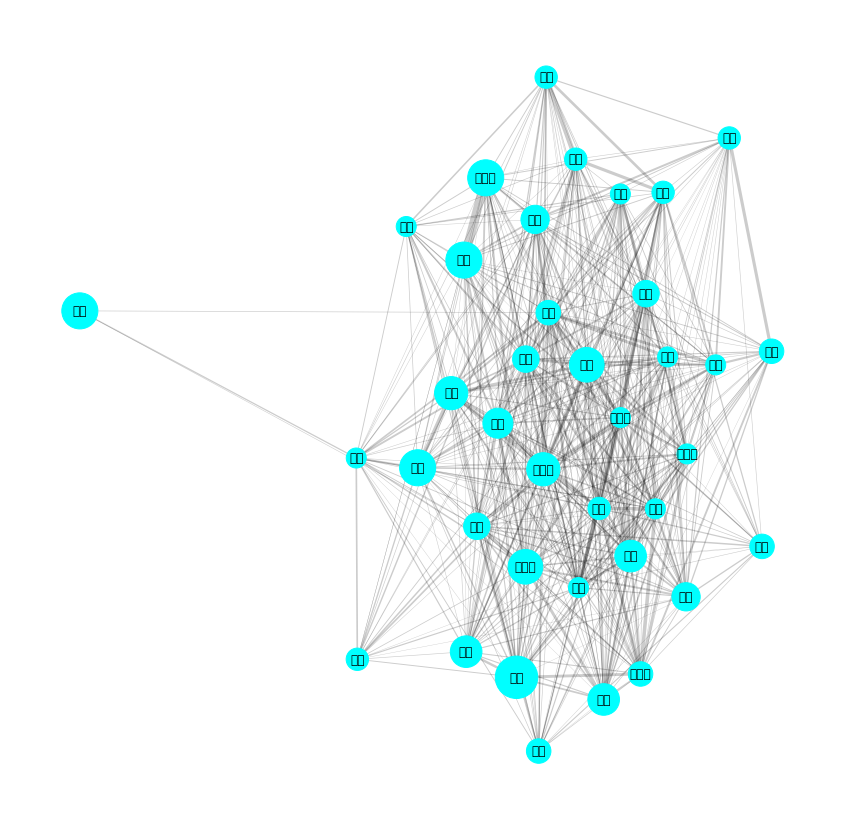

In [42]:
create_word_network(one_word_cnt_df,cnt=3)

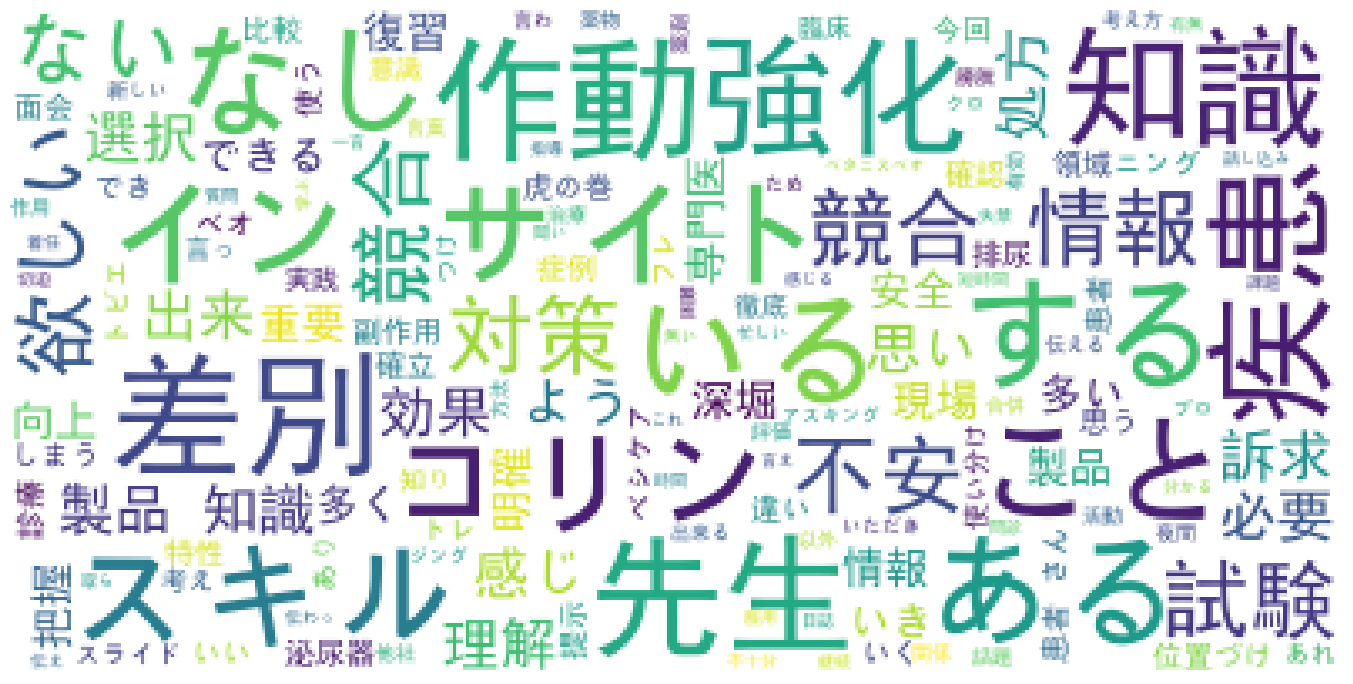

In [40]:
def word_cloud(text_word_list):
    import matplotlib.pyplot as plt
    from wordcloud import WordCloud
    wordcloud_text=' '.join(text_word_list)
    wc = WordCloud(max_words=2000,
                max_font_size=40,
                font_path='./fonts/simhei.ttf',
                # font_path='../input/chinesewordcloud/SourceHanSerifK-Light.otf',
                background_color='white',
#                 width=800,  # 生成图片的大小
#                 height=600,
                random_state=42,
                relative_scaling=0)
    wc.generate(wordcloud_text)
    # Plot
    plt.figure(figsize=(24.0,16.0))
    plt.axis('off')
    plt.imshow(wc)
    plt.show()
    
word_cloud(one_word_list)